In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root

def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    #scalar.append('ncharged')
    #scalar.append('nneutral')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    #scalar.append('e_jet')
    scalar.append('pt_jet')
    #scalar.append('eta_jet')
    #scalar.append('phi_jet')
    #scalar.append('p_jet')
    #scalar.append('theta_jet')
    #scalar.append('e_quark')
    #scalar.append('pt_quark')
    #scalar.append('eta_quark')
    #scalar.append('phi_quark')
    #scalar.append('p_quark')
    #scalar.append('theta_quark')
    #scalar.append('e_electron')
    #scalar.append('pt_electron')
    #scalar.append('eta_electron')
    #scalar.append('phi_electron')
    #scalar.append('p_electron')
    #scalar.append('theta_electron')
    #scalar.append('e_photon')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  end-start, 'seconds'
    return pd.concat([x for x in dataframes])

def normalize(counts, dataframeBeforeCut):
    xsec = np.mean(dataframeBeforeCut['xsec'])
    ntrials = dataframeBeforeCut['ntrials'][dataframeBeforeCut.shape[0]-1]
    return 10 * (counts * xsec * 1e12) / ntrials

def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

def bins(inputDataframe, variable, array):  
    ds=[]
    for i in range(0,len(array)-1):
        ds.append(inputDataframe.query('' + str(variable) + ' > ' + str(array[i]) + ' and ' + str(variable) + ' < ' + str(array[i+1]) + ''))
    return ds

def toStr(inputArray):
    length = inputArray.size
    array = []
    for i in range(0,length):
        array.append(str(inputArray[i])) 
    return array

def keepOneJet(inputDataframe):    
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.loc[~dataframe['evid'].duplicated(keep='first')]
    print 'Remove extra jets', cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
dataFiles = ["$HOME/fjpythia/output/723.root"]
df = getData(dataFiles)

print '\n', 'Cuts: 0.01 < y < 0.85, W2 > 4 GeV2, pt_jet > 4 GeV', '\n'
d = applyCut(df, 'y > 0.01 and y < 0.85', '0.01 < y < 0.85')
d = applyCut(d, 'W2 > 4', 'W2 > 4')
d = applyCut(d, 'pt_jet > 5', 'pt_jet > 5')
d = keepOneJet(d)
d1 = applyCut(d, 'Q2 > 1 and Q2 < 5', '1 < Q2 < 5')
d2 = applyCut(d, 'Q2 > 5 and Q2 < 10', '5 < Q2 < 10')
d3 = applyCut(d, 'Q2 > 10', 'Q2 > 10')

def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q')
    scalar.append('W2')
    scalar.append('pt_jet')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  end-start, 'seconds'
    return pd.concat([x for x in dataframes])

eataFiles = ["$HOME/fjpythia/june_july/100/polar/715.root"]
ef = getData(eataFiles)

ef.eval('Q2 = Q*Q', inplace = True)

print '\n', 'Cuts: 0.01 < y < 0.85, W2 > 4 GeV2, pt_jet > 4 GeV', '\n'
e = applyCut(ef, 'y > 0.01 and y < 0.85', '0.01 < y < 0.85')
e = applyCut(e, 'W2 > 4', 'W2 > 4')
e = applyCut(e, 'pt_jet > 5', 'pt_jet > 5')
e = keepOneJet(e)
e1 = applyCut(e, 'Q2 > 1 and Q2 < 5', '1 < Q2 < 5')
e2 = applyCut(e, 'Q2 > 5 and Q2 < 10', '5 < Q2 < 10')
e3 = applyCut(e, 'Q2 > 10', 'Q2 > 10')


Processed $HOME/fjpythia/output/723.root in 29.2036850452 seconds

Cuts: 0.01 < y < 0.85, W2 > 4 GeV2, pt_jet > 4 GeV 

0.01 < y < 0.85 28989288  fraction kept: 66.1
W2 > 4 28989288  fraction kept: 100.0
pt_jet > 5 635803  fraction kept: 2.2
Remove extra jets 471837  fraction kept: 74.2
1 < Q2 < 5 179086  fraction kept: 38.0
5 < Q2 < 10 58434  fraction kept: 12.4
Q2 > 10 234317  fraction kept: 49.7

Processed $HOME/fjpythia/june_july/100/polar/715.root in 29.4697380066 seconds

Cuts: 0.01 < y < 0.85, W2 > 4 GeV2, pt_jet > 4 GeV 

0.01 < y < 0.85 26935356  fraction kept: 61.9
W2 > 4 26935356  fraction kept: 100.0
pt_jet > 5 712052  fraction kept: 2.6
Remove extra jets 537919  fraction kept: 75.5
1 < Q2 < 5 188003  fraction kept: 35.0
5 < Q2 < 10 71645  fraction kept: 13.3
Q2 > 10 278271  fraction kept: 51.7


In [3]:
x_array_float = np.logspace(-2.4, 0.0, num=21)
x_array = toStr(x_array_float)    
x_interval = np.zeros(len(x_array)-1)
for i in range(0,len(x_array)-1):
    x_interval[i] = x_array_float[i+1] - x_array_float[i]
zeros = np.zeros(len(x_interval))
d_x_array = bins(d,'x',x_array)
e_x_array = bins(e,'x',x_array)

counts_d = np.zeros(len(d_x_array))
for i in range(0,len(d_x_array)):
    counts_d[i] = normalize(len(d_x_array[i]),df)
    
counts_e = np.zeros(len(e_x_array))
for i in range(0,len(e_x_array)):
    counts_e[i] = normalize(len(e_x_array[i]),ef)

Cuts: Q2 > 1 GeV^2, 0.01 < y < 0.85, W2 > 4 GeV^2, pt_jet > 4 GeV


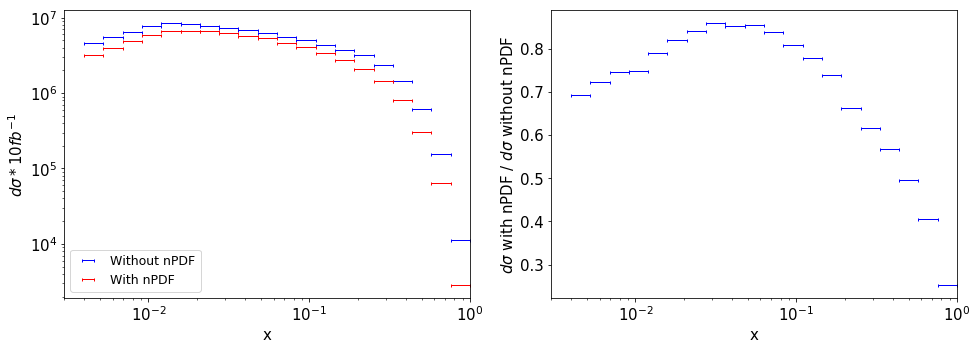

In [4]:
fig = plt.figure(figsize=(16,18))
plt.subplots_adjust(hspace=0.2)

plt.subplot(3,2,1)
plt.errorbar(x_array_float[:-1], counts_d, xerr=[zeros, x_interval], fmt='none', label='Without nPDF',ecolor='b', elinewidth=1, capsize=1.5)
plt.errorbar(x_array_float[:-1], counts_e, xerr=[zeros, x_interval], fmt='none', label='With nPDF',ecolor='r', elinewidth=1, capsize=1.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('x', fontsize = 15)
plt.ylabel('$d\sigma*10fb^{-1}$', fontsize = 15)
plt.yscale('log')
plt.xscale('log')
plt.legend(prop={'size': 12.5},frameon=True)
plt.xlim(left=0.003, right=1)

plt.subplot(3,2,2)
plt.errorbar(x_array_float[:-1], counts_e/counts_d, xerr=[zeros, x_interval], fmt='none',ecolor='b', elinewidth=1, capsize=1.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('x', fontsize = 15)
plt.ylabel('$d\sigma$ with nPDF / $d\sigma$ without nPDF', fontsize = 15)
plt.xscale('log')
plt.xlim(left=0.003, right=1)

print 'Cuts: Q2 > 1 GeV^2, 0.01 < y < 0.85, W2 > 4 GeV^2, pt_jet > 4 GeV'

In [5]:
print min(d['Q2']), min(e['Q2'])

1.00694131851 1.00748646259


In [20]:
x_array_float = np.logspace(-2.4, 0.0, num=21)
x_array = toStr(x_array_float)    
x_interval = np.zeros(len(x_array)-1)
for i in range(0,len(x_array)-1):
    x_interval[i] = x_array_float[i+1] - x_array_float[i]
zeros = np.zeros(len(x_interval))
d2_x_array = bins(d2,'x',x_array)
e2_x_array = bins(e2,'x',x_array)

counts_d = np.zeros(len(d2_x_array))
for i in range(0,len(d2_x_array)):
    counts_d[i] = normalize(len(d2_x_array[i]),df)
    
counts_e = np.zeros(len(e2_x_array))
for i in range(0,len(e2_x_array)):
    counts_e[i] = normalize(len(e2_x_array[i]),ef)

/home/youqi/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in divide


Cuts: 5 < Q2 < 10 GeV^2, 0.01 < y < 0.85, W2 > 4 GeV^2, pt_jet > 5 GeV


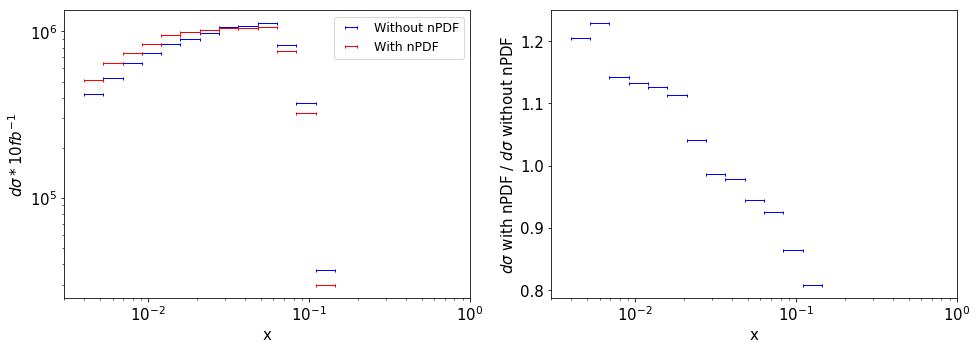

In [22]:
fig = plt.figure(figsize=(16,18))
plt.subplots_adjust(hspace=0.2)

plt.subplot(3,2,1)
plt.errorbar(x_array_float[:-1], counts_d, xerr=[zeros, x_interval], fmt='none', label='Without nPDF',ecolor='b', elinewidth=1, capsize=1.5)
plt.errorbar(x_array_float[:-1], counts_e, xerr=[zeros, x_interval], fmt='none', label='With nPDF',ecolor='r', elinewidth=1, capsize=1.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('x', fontsize = 15)
plt.ylabel('$d\sigma*10fb^{-1}$', fontsize = 15)
plt.yscale('log')
plt.xscale('log')
plt.legend(prop={'size': 12.5},frameon=True)
plt.xlim(left=0.003, right=1)

plt.subplot(3,2,2)
plt.errorbar(x_array_float[:-1], counts_e/counts_d, xerr=[zeros, x_interval], fmt='none',ecolor='b', elinewidth=1, capsize=1.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('x', fontsize = 15)
plt.ylabel('$d\sigma$ with nPDF / $d\sigma$ without nPDF', fontsize = 15)
plt.xscale('log')
plt.xlim(left=0.003, right=1)

print 'Cuts: 5 < Q2 < 10 GeV^2, 0.01 < y < 0.85, W2 > 4 GeV^2, pt_jet > 5 GeV'

In [18]:
x_array_float = np.logspace(-2.4, 0.0, num=21)
x_array = toStr(x_array_float)    
x_interval = np.zeros(len(x_array)-1)
for i in range(0,len(x_array)-1):
    x_interval[i] = x_array_float[i+1] - x_array_float[i]
zeros = np.zeros(len(x_interval))
d3_x_array = bins(d3,'x',x_array)
e3_x_array = bins(e3,'x',x_array)

counts_d = np.zeros(len(d3_x_array))
for i in range(0,len(d3_x_array)):
    counts_d[i] = normalize(len(d3_x_array[i]),df)
    
counts_e = np.zeros(len(e3_x_array))
for i in range(0,len(e3_x_array)):
    counts_e[i] = normalize(len(e3_x_array[i]),ef)

Cuts: Q2 > 10 GeV^2, 0.01 < y < 0.85, W2 > 4 GeV^2, pt_jet > 5 GeV


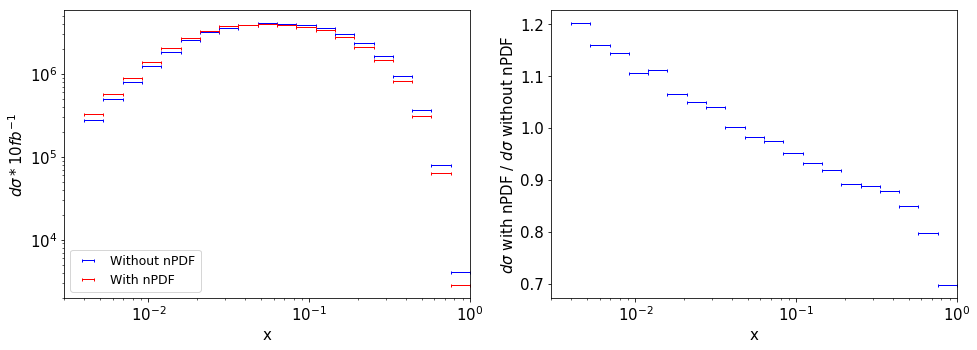

In [19]:
fig = plt.figure(figsize=(16,18))
plt.subplots_adjust(hspace=0.2)

plt.subplot(3,2,1)
plt.errorbar(x_array_float[:-1], counts_d, xerr=[zeros, x_interval], fmt='none', label='Without nPDF',ecolor='b', elinewidth=1, capsize=1.5)
plt.errorbar(x_array_float[:-1], counts_e, xerr=[zeros, x_interval], fmt='none', label='With nPDF',ecolor='r', elinewidth=1, capsize=1.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('x', fontsize = 15)
plt.ylabel('$d\sigma*10fb^{-1}$', fontsize = 15)
plt.yscale('log')
plt.xscale('log')
plt.legend(prop={'size': 12.5},frameon=True)
plt.xlim(left=0.003, right=1)

plt.subplot(3,2,2)
plt.errorbar(x_array_float[:-1], counts_e/counts_d, xerr=[zeros, x_interval], fmt='none',ecolor='b', elinewidth=1, capsize=1.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('x', fontsize = 15)
plt.ylabel('$d\sigma$ with nPDF / $d\sigma$ without nPDF', fontsize = 15)
plt.xscale('log')
plt.xlim(left=0.003, right=1)

print 'Cuts: Q2 > 10 GeV^2, 0.01 < y < 0.85, W2 > 4 GeV^2, pt_jet > 5 GeV'